异常检测实战task：
1、基于 anomaly_data.csv数据，可视化数据分布情况、及其对应高斯分布的概率密度函数
2、建立模型，实现异常数据点预测
3、可视化异常检测处理结果
4、修改概率分布阈值EllipticEnvelope(contamination=0.1)中的contamination，查看阈值改变对结果的影响

In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv("anomaly_data.csv")
data.head()

,x1,x2
0,8.046815,9.741152
1,8.408520,8.763270
2,9.195915,10.853181
3,9.914701,11.174260
4,8.576700,9.042849


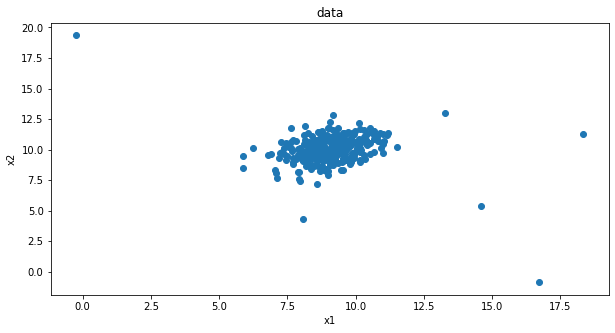

In [7]:
# 可视化
from matplotlib import pyplot as plt
fig1 = plt.figure(figsize=(10, 5))
plt.scatter(data.loc[:,'x1'],data.loc[:,'x2'])
plt.title('data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()


In [9]:
# 赋值
x1 = data.loc[:,'x1']
x2 = data.loc[:,'x2']

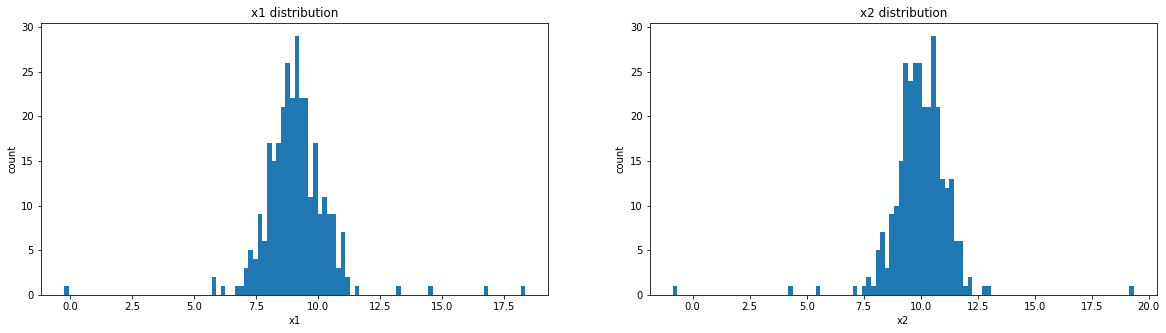

In [13]:
# 数据分布可视化
fig2 = plt.figure(figsize=(20,5))
plt.subplot(121)
plt.hist(x1, bins =100)
plt.title('x1 distribution')
plt.ylabel('count')
plt.xlabel('x1')

plt.subplot(122)
plt.hist(x2, bins =100)
plt.title('x2 distribution')
plt.ylabel('count')
plt.xlabel('x2')

plt.show()

In [14]:
# 高斯分布，求均值，标准差
x1_mean = x1.mean()
x1_sigma= x1.std()
x2_mean = x2.mean()
x2_sigma= x2.std()

print(x1_mean, x1_sigma, x2_mean, x2_sigma)

9.112225783931596 1.3559573758220915 9.997710507954398 1.30970711753864


In [21]:
# 计算高斯分布概率密度
from scipy.stats import norm
# 0 - 20 有 300 个点的分布
x1_range = np.linspace(0, 20, 300)
x1_normal = norm.pdf(x1_range, x1_mean, x1_sigma)

x2_range = np.linspace(0, 20, 300)
x2_normal = norm.pdf(x2_range, x2_mean, x2_sigma)

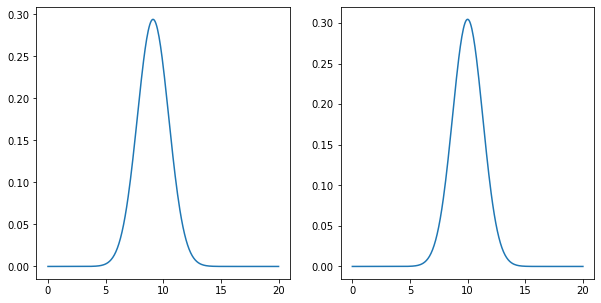

In [22]:
# 可视化
fig2 = plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(x1_range, x1_normal)
plt.subplot(122)
plt.plot(x2_range, x2_normal)

In [35]:
# 建立模型，进行检测
from sklearn.covariance import EllipticEnvelope
ad_model = EllipticEnvelope(contamination = 0.03)
ad_model.fit(data)

EllipticEnvelope(contamination=0.03)

In [36]:
# make prediction
y_predict = ad_model.predict(data)

print(pd.value_counts(y_predict))

 1    297
-1     10
dtype: int64


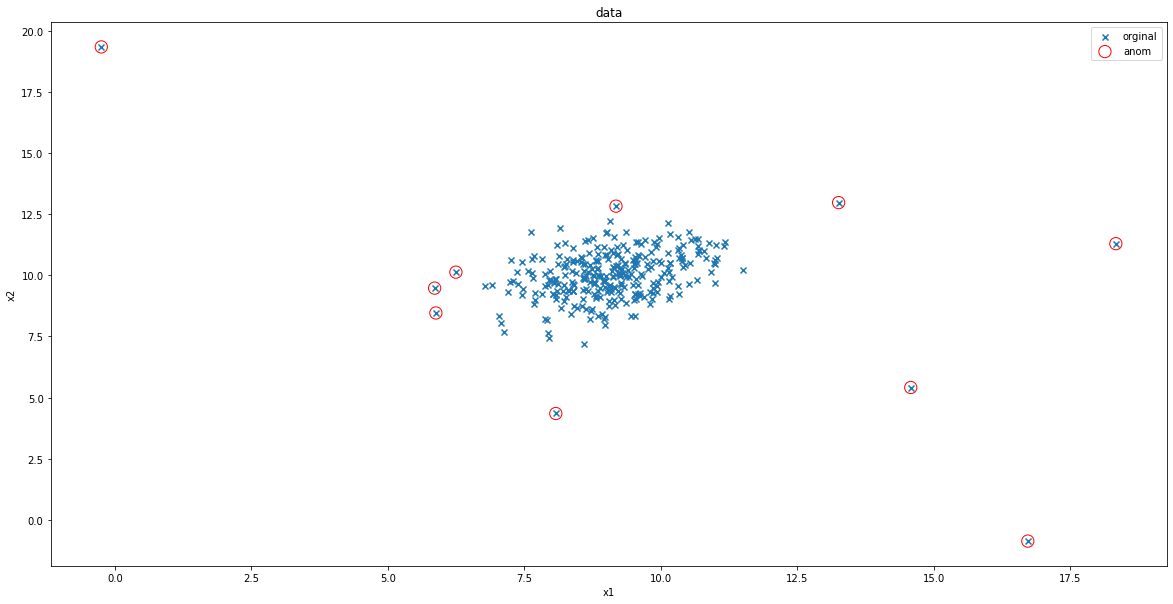

In [37]:
# 可视化结果
fig4 = plt.figure(figsize=(20, 10))
orginal_data=plt.scatter(data.loc[:,'x1'],data.loc[:,'x2'],marker='x')
anomaly_data=plt.scatter(data.loc[:,'x1'][y_predict==-1],data.loc[:,'x2'][y_predict==-1],marker='o',facecolor='none',edgecolor='red',s=150)

plt.title('data')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend((orginal_data,anomaly_data),('orginal','anom'))
plt.show()